# **Marketing Campaign Customer Classification**

## Variable description

ID - customer ID  
Year_Birth - customer birth year  
Education - customer’s level of education  
Marital_Status - customer’s marital status  
Income - customer’s yearly household income  
Kidhome - number of small children in customer’s household  
Teenhome - number of teenagers in customer’s household  
Dt_Customer - date of customer’s enrolment with the company  
Recency - number of days since the last purchase  
  
MntWines - amount spent on wine products in the last 2 years  
MntFruits - amount spent on fruits products in the last 2 years  
MntMeatProducts - amount spent on meat products in the last 2 years  
MntFishProducts - amount spent on fish products in the last 2 years  
MntSweetProducts - amount spent on sweet products in the last 2 years  
MntGoldProds - amount spent on gold products in the last 2 years  
  
NumDealsPurchases - number of purchases made with discount  
NumCatalogPurchases - number of purchases made using catalogue  
NumStorePurchases - number of purchases made directly in stores  
NumWebPurchases - number of purchases made through company’s web site  
NumWebVisitsMonth - number of visits to company’s web site in the last month  
  
AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Complain - 1 if customer complained in the last 2 years  
Z_CostContact - cost to contact a customer (\\$3)  
Z_revenue - revenue after client accepting campaign (\$11)   
  
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise  


## Load necessary packages

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Load the data

In [56]:
marketingdata = pd.read_csv('marketing_campaign.csv', sep=';')
marketingdata.head() # top five records

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [57]:
# Examine the structure of the data frame including its meta data
marketingdata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [58]:
marketingdata.tail() # the last five records

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [59]:
marketingdata.shape

(2240, 29)

There are 2240 observations with 29 columns/features. Two features are categorical (Education and Marital Status), one feature is a date (Dt_Customer) and the remaining 26 columns are numeric, including the numeric ID (index) variable.

# Exploratory Data Analysis

## Examine and address missing values

In [60]:
# Check for any missing values
marketingdata.isnull().values.any()

True

Identify which columns have missing values and number of missing values.

In [61]:
# Detect the number of missing values in the data set
marketingdata.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [62]:
# Get index values for missing income rows
missingIndex = marketingdata[marketingdata['Income'].isnull()].index.tolist()
print(missingIndex)

[10, 27, 43, 48, 58, 71, 90, 91, 92, 128, 133, 312, 319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081, 2084, 2228]


In [63]:
# Address missing income values using scikit-learn's iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [64]:
# Create numeric dataset
mdNumeric = marketingdata.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue', 'Education', 'Marital_Status', 'Dt_Customer'])
mdNumeric.shape

(2240, 23)

In [65]:
# Save column names
cols = mdNumeric.columns
print(cols)

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


In [66]:
# Initialize iterative imputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(mdNumeric)

IterativeImputer(random_state=0)

In [67]:
filled = imp.transform(mdNumeric)  # Transform missing
filled = pd.DataFrame(filled)      # Convert to dataframe
filled.columns = cols              # Add column names
filled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,...,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,...,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,...,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,...,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,...,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Replace original Income column with filled income column
marketingdata['Income'] = filled['Income']
marketingdata['Income'].describe()

count      2240.000000
mean      52232.041383
std       25103.854720
min        1730.000000
25%       35233.500000
50%       51301.000000
75%       68468.250000
max      666666.000000
Name: Income, dtype: float64

In [69]:
# Check whether any NA values remain.
marketingdata.isnull().values.any()

False

Scikit learn's Iterative Imputer was used to fill the 24 missing values for Income.

## Descriptive statistics

In [70]:
marketingdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52232.041383,25103.854720,1730.0,35233.50,51301.0,68468.25,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [71]:
# Identify the unique values of each column in our dataframe
dfColumns = []
for i in marketingdata.columns:
    dfColumns.append([i, marketingdata[i].nunique(), marketingdata[i].drop_duplicates().values])
pd.DataFrame(dfColumns, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,1998,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-09-04, 2014-03-08, 2013-08-21, 2014-02-1..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


## Data Visualization

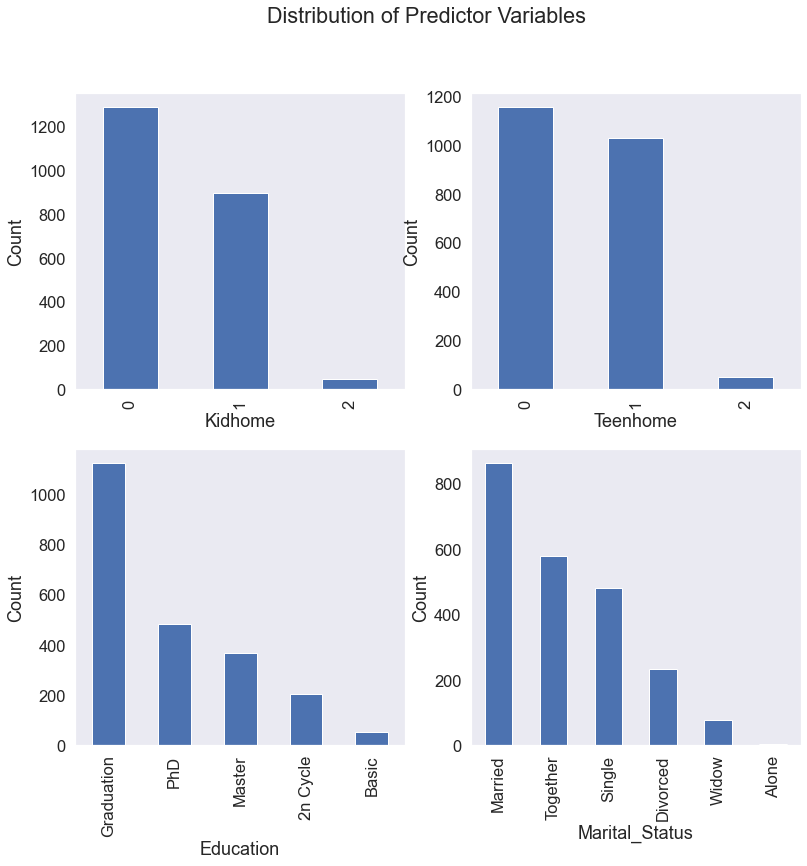

In [101]:
subset = marketingdata[['Kidhome', 'Teenhome', 'Education', 'Marital_Status']]
fig = plt.figure(figsize = (13, 12))
sns.set(font_scale = 1.5)
fig.suptitle('Distribution of Predictor Variables')
j = 1
for i in subset.columns:
    
    counts = marketingdata[i].value_counts()
    counts
    
    ax1 = fig.add_subplot(2, 2, j)
    ax1.set_xlabel(i)
    ax1.set_ylabel('Count')
    #ax1.set_title(i + " Distribution")
    counts.plot(kind='bar', grid = False)
 
    j += 1
    fig.tight_layout

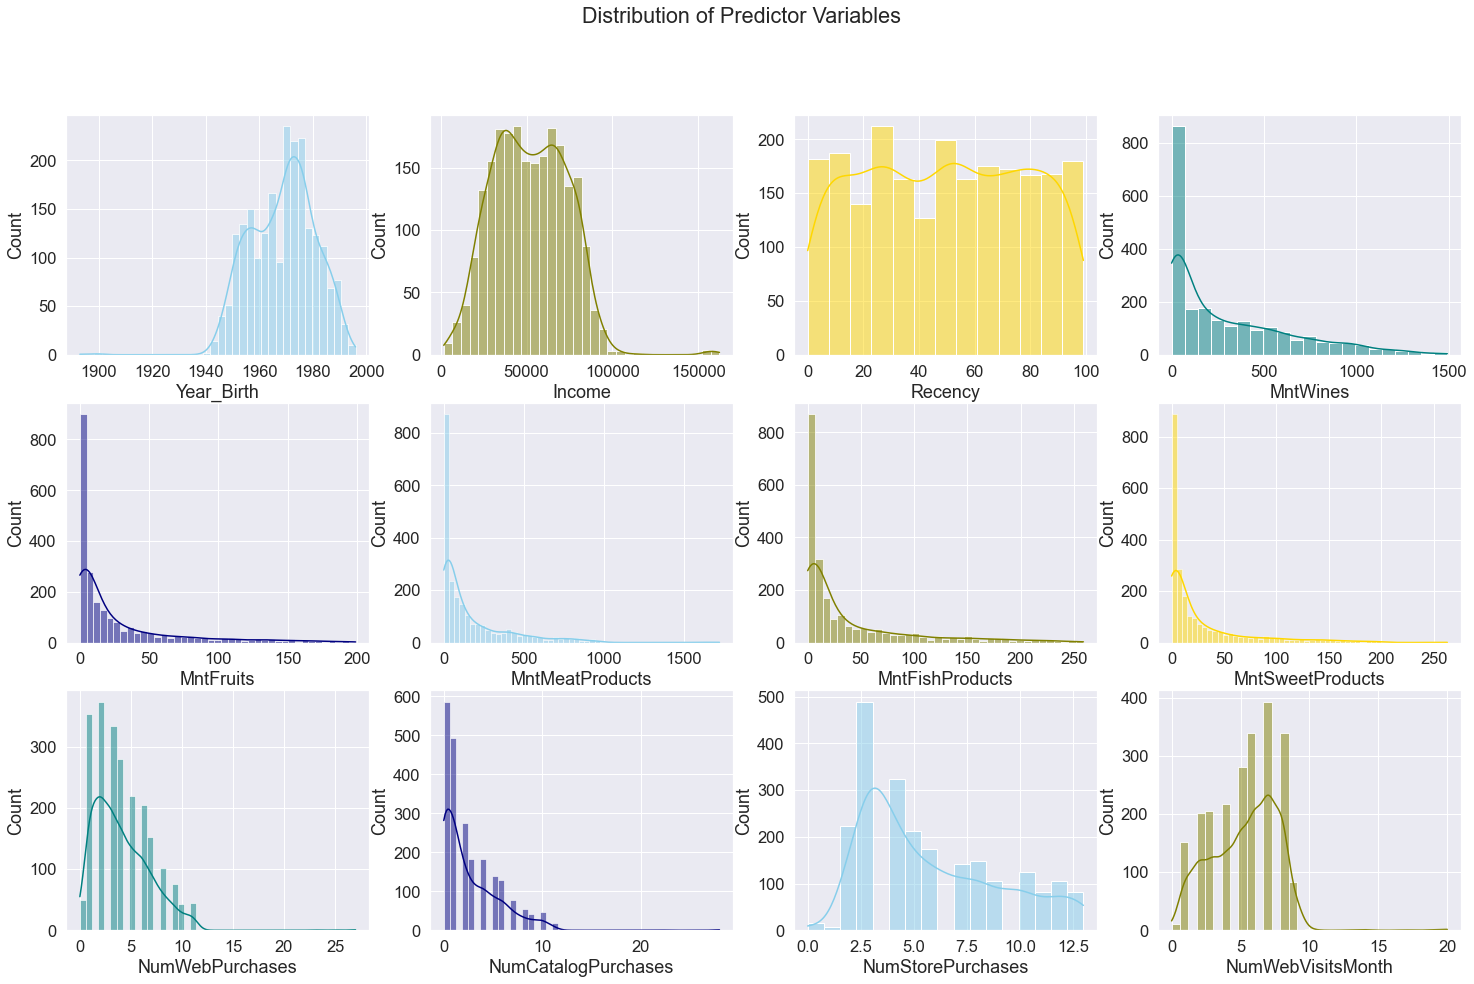

In [107]:
# Histograms for Year_Birth, Income, Recency, MntWines, MntFruits, 
# MntMeatProducts, MntFishProducts, MntSweetProducts
# NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

fig, axs = plt.subplots(3, 4, figsize=(25, 15))

fig.suptitle('Distribution of Predictor Variables')

sns.histplot(data=marketingdata, x="Year_Birth", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=marketingdata, x="Income", kde=True, color="olive", ax=axs[0,1])
sns.histplot(data=marketingdata, x="Recency", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=marketingdata, x="MntWines", kde=True, color='teal', ax=axs[0, 3])

sns.histplot(data=marketingdata, x="MntFruits", kde=True, color='navy', ax=axs[1, 0])
sns.histplot(data=marketingdata, x="MntMeatProducts", kde=True, color='skyblue', ax=axs[1, 1])
sns.histplot(data=marketingdata, x="MntFishProducts", kde=True, color='olive', ax=axs[1, 2])
sns.histplot(data=marketingdata, x="MntSweetProducts", kde=True, color='gold', ax=axs[1, 3])

sns.histplot(data=marketingdata, x="NumWebPurchases", kde=True, color='teal', ax=axs[2, 0])
sns.histplot(data=marketingdata, x="NumCatalogPurchases", kde=True, color='navy', ax=axs[2, 1])
sns.histplot(data=marketingdata, x="NumStorePurchases", kde=True, color='skyblue', ax=axs[2, 2])
sns.histplot(data=marketingdata, x="NumWebVisitsMonth", kde=True, color='olive', ax=axs[2, 3])

plt.show()

The bar plots above show that most customers achieved "Graduation" level of education, which is equivalent to high school graduation. The top two categories of marital status are "Married" and "Together" indicating most customers are coupled. Furthermore, more than half of customers have 0 children or teens at home, and the next highest frequency is 1.

The histograms show that year_birth is approximately normally distributed. Income is also somewhat normally distributed, but right skewed due to outliers on the high end. The recency variable has an approximately uniform distribution, which is expected assuming that the customers were last contacted on a uniform/regular basis. The amount of wines, fruits, meat products, fish products, and sweet produces purchased are heavily right skewed. The number of web, catalog, and store purchases are somewhat right skewed, and the distribution of the number of web vists per month is somewhat left skewed.

In [75]:
# Create numeric dataset for predictor variables
mdNumeric = marketingdata.drop(columns=['Education', 'Marital_Status', 'Dt_Customer'])
mdNumeric.shape

(2240, 26)

In [76]:
# rounding off to two decimal places
cors = mdNumeric.corr().round(2)
cors

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.00,0.00,0.01,0.00,-0.00,-0.05,-0.02,0.00,-0.00,-0.02,...,-0.01,-0.04,-0.03,-0.01,-0.02,-0.02,0.03,NaN,NaN,-0.02
Year_Birth,0.00,1.00,-0.16,0.23,-0.35,-0.02,-0.16,-0.02,-0.03,-0.04,...,0.12,0.06,-0.06,0.01,-0.01,-0.01,-0.03,NaN,NaN,0.02
Income,0.01,-0.16,1.00,-0.43,0.02,-0.00,0.58,0.43,0.58,0.44,...,-0.55,-0.02,0.19,0.34,0.28,0.09,-0.03,NaN,NaN,0.13
Kidhome,0.00,0.23,-0.43,1.00,-0.04,0.01,-0.50,-0.37,-0.44,-0.39,...,0.45,0.01,-0.16,-0.21,-0.17,-0.08,0.04,NaN,NaN,-0.08
Teenhome,-0.00,-0.35,0.02,-0.04,1.00,0.02,0.00,-0.18,-0.26,-0.20,...,0.13,-0.04,0.04,-0.19,-0.14,-0.02,0.00,NaN,NaN,-0.15
Recency,-0.05,-0.02,-0.00,0.01,0.02,1.00,0.02,-0.00,0.02,0.00,...,-0.02,-0.03,0.02,0.00,-0.02,-0.00,0.01,NaN,NaN,-0.20
MntWines,-0.02,-0.16,0.58,-0.50,0.00,0.02,1.00,0.39,0.56,0.40,...,-0.32,0.06,0.37,0.47,0.35,0.21,-0.04,NaN,NaN,0.25
MntFruits,0.00,-0.02,0.43,-0.37,-0.18,-0.00,0.39,1.00,0.54,0.59,...,-0.42,0.01,0.01,0.22,0.19,-0.01,-0.01,NaN,NaN,0.13
MntMeatProducts,-0.00,-0.03,0.58,-0.44,-0.26,0.02,0.56,0.54,1.00,0.57,...,-0.54,0.02,0.10,0.37,0.31,0.04,-0.02,NaN,NaN,0.24
MntFishProducts,-0.02,-0.04,0.44,-0.39,-0.20,0.00,0.40,0.59,0.57,1.00,...,-0.45,0.00,0.02,0.20,0.26,0.00,-0.02,NaN,NaN,0.11


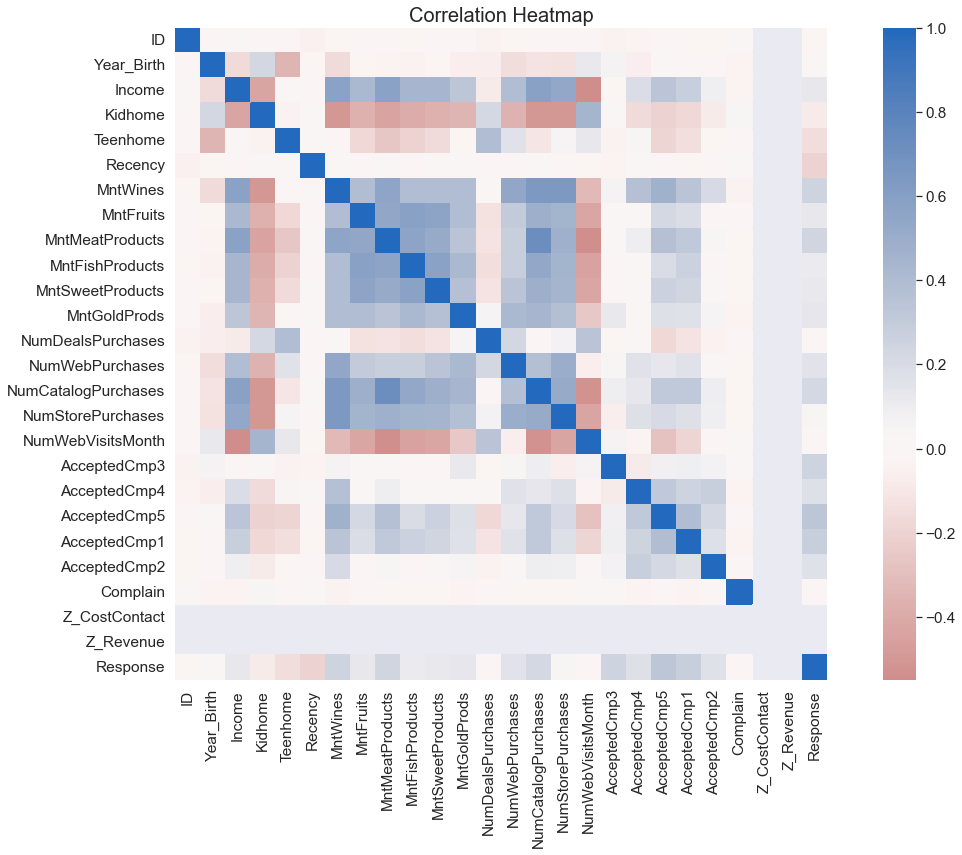

In [77]:
# Create a correlation heatmap
sns.set(rc = {'figure.figsize':(20,12)}, font_scale=1.4)  # Set figure size and font size
sns.heatmap(cors, annot_kws={'size':8}, cmap="vlag_r", center=0, cbar=True, square=True, fmt='.2f')  # Creates a correlation heatmap using seaborn
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

The correlation heatmap indicates the amounts spent on wines, fruits, meat products, fish products, sweet products, and gold products are positively correlated with each other. It appears having a child at home is negatively correlated with amount spent on products purchased and the number of web, catalogue, and store purchases, but is positively correlated with number of web visits per month and number of purchases made using deals. Another interesting note is that income is positively correlated with amount of products purchased and number of web, catalog, and store purchases, but is negatively correlated with number of web visits per month.

## Address Income outlier

In [78]:
# Remove income outlier, which is over four times as large as the next largest value (162,397).
marketingdata.drop(marketingdata.index[marketingdata['Income'] == 666666], inplace=True)

In [79]:
marketingdata['Income'].describe().T

count      2239.000000
mean      51957.617998
std       21487.656544
min        1730.000000
25%       35221.000000
50%       51287.000000
75%       68429.500000
max      162397.000000
Name: Income, dtype: float64

## Feature engineering/reduction

In [80]:
# Drop ID (index), Z_CostContact, Z_Revenue (values the same for all rows)
marketingdata.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)
marketingdata.shape

(2239, 26)

In [81]:
# Marital/Relationship Status
marketingdata['Marital_Status'].value_counts()

Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

A new variable, "RelStatus", was created that combined marital status into two groups, "Single" and "Coupled". The original marital status variable had eight categories with a total of seven customers in the "YOLO", "Absurd" and "Alone" categories. "Alone", "Widow" and "Divorced" were combined into "Single". "Together" and "Married" were combined into "Coupled". The customers whose relationship statuses were "Absurd" and "YOLO" were removed because a relationship status could not be determined.

In [82]:
marketingdata.loc[marketingdata['Marital_Status'] == 'Single', 'RelStatus'] = 'Single'
marketingdata.loc[marketingdata['Marital_Status'] == 'Widow', 'RelStatus'] = 'Single'
marketingdata.loc[marketingdata['Marital_Status'] == 'Alone', 'RelStatus'] = 'Single'
marketingdata.loc[marketingdata['Marital_Status'] == 'Divorced', 'RelStatus'] = 'Single'
marketingdata.loc[marketingdata['Marital_Status'] == 'Married', 'RelStatus'] = 'Coupled'
marketingdata.loc[marketingdata['Marital_Status'] == 'Together', 'RelStatus'] = 'Coupled'
marketingdata.loc[marketingdata['Marital_Status'] == 'YOLO', 'RelStatus'] = 'NaN'
marketingdata.loc[marketingdata['Marital_Status'] == 'Absurd', 'RelStatus'] = 'NaN'

In [83]:
marketingdata['RelStatus'].value_counts()

Coupled    1443
Single      792
NaN           4
Name: RelStatus, dtype: int64

In [84]:
# dropping NAN (YOLO and Absurd) records
marketingdata.drop(marketingdata[marketingdata['RelStatus'] == 'NaN'].index, inplace=True)

We engineered new features by combining features in the same category to examine whether these features are better at predicting our target variable.

In [85]:
# create AmountSpent, which is the summation of the amount of money spent on products by the customer.
marketingdata['amountSpent'] =  marketingdata['MntFishProducts'] + marketingdata['MntMeatProducts'] + marketingdata['MntFruits'] + marketingdata['MntSweetProducts'] + marketingdata['MntWines'] + marketingdata['MntGoldProds']

# Created numOfPurchases, which is a summation of purchases made from the catalogue, web or in-store
marketingdata['numOfPurchases'] = marketingdata['NumDealsPurchases'] + marketingdata['NumCatalogPurchases'] + marketingdata['NumStorePurchases'] + marketingdata['NumWebPurchases']

# Created numOfMinorsHome, which is a summation of Teenhome and KidHome
marketingdata['numOfMinorsHome'] =  marketingdata['Teenhome'] + marketingdata['Kidhome'] 

# Created prvAcceptedCampaigns, which is a summation of the previous campaigns a customer participated in. 
marketingdata['prvAcceptedCampaigns'] = marketingdata['AcceptedCmp1'] + marketingdata['AcceptedCmp2'] + marketingdata['AcceptedCmp3'] + marketingdata['AcceptedCmp4'] + marketingdata['AcceptedCmp5']

marketingdata['dateCust'] = pd.to_datetime(marketingdata['Dt_Customer'])

# Created custage, which is the age when the customer enrolled at our company. 
marketingdata['dateCustYear'] = pd.DatetimeIndex(pd.to_datetime(marketingdata['Dt_Customer'], format='%Y-%m-%d')).year

marketingdata['custAge'] = marketingdata['dateCustYear'] - marketingdata['Year_Birth']


In [86]:
# Dropping columns used to create aggregated feature
md_reduced = marketingdata.drop(columns=['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts',
                                         'MntWines', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
                                        'NumStorePurchases', 'NumWebPurchases', 'Teenhome', 'Kidhome',
                                        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                        'AcceptedCmp5', 'Dt_Customer', 'Marital_Status'])
md_reduced

,Year_Birth,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,RelStatus,amountSpent,numOfPurchases,numOfMinorsHome,prvAcceptedCampaigns,dateCust,dateCustYear,custAge
0,1957,Graduation,58138.0,58,7,0,1,Single,1617,25,0,0,2012-09-04,2012,55
1,1954,Graduation,46344.0,38,5,0,0,Single,27,6,2,0,2014-03-08,2014,60
2,1965,Graduation,71613.0,26,4,0,0,Coupled,776,21,0,0,2013-08-21,2013,48
3,1984,Graduation,26646.0,26,6,0,0,Coupled,53,8,1,0,2014-02-10,2014,30
4,1981,PhD,58293.0,94,5,0,0,Coupled,422,19,1,0,2014-01-19,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,61223.0,46,5,0,0,Coupled,1341,18,1,0,2013-06-13,2013,46
2236,1946,PhD,64014.0,56,7,0,0,Coupled,444,22,3,1,2014-06-10,2014,68
2237,1981,Graduation,56981.0,91,6,0,0,Single,1241,19,0,1,2014-01-25,2014,33
2238,1956,Master,69245.0,8,3,0,0,Coupled,843,23,1,0,2014-01-24,2014,58


## Data visualization for new features/bivariate distributions

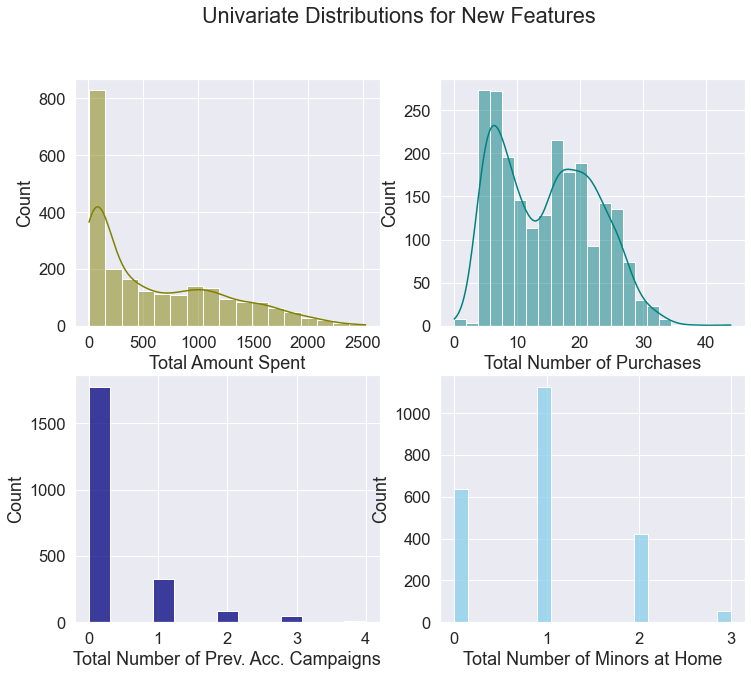

In [117]:
# Plot histograms for amountSpent and numOfPurchases

sns.set(font_scale = 1.5)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

fig.suptitle('Univariate Distributions for New Features')

axs[0,0].set_xlabel("Total Amount Spent")
sns.histplot(data=md_reduced, x="amountSpent", kde=True, color='olive', ax=axs[0,0])

axs[0,1].set_xlabel("Total Number of Purchases")
sns.histplot(data=md_reduced, x="numOfPurchases", kde=True, color='teal', ax=axs[0,1])

axs[1,0].set_xlabel("Total Number of Prev. Acc. Campaigns")
sns.histplot(data=md_reduced, x="prvAcceptedCampaigns", color='navy', ax=axs[1,0])

axs[1,1].set_xlabel("Total Number of Minors at Home")
sns.histplot(data=md_reduced, x="numOfMinorsHome", color='skyblue', ax=axs[1,1])

plt.show()

The distributions of the engineered features indicate that amount spent is heavily right skewed, number of purchases appears to be multi-modal and somewhat right skewed. Number of previously accepted campaigns is heavily right skewed, with most individuals accepting a total of zero campaigns. Finally, a majority of customers have one child or teen at home, with the next highest frequency being zero minors at home.

## Examine the response variable and predictor variables by response

In [118]:
# Replace the values of 0 and 1 in the data set
md_reduced.loc[md_reduced['Response'] == 1, 'Response'] = 'Yes'
md_reduced.loc[md_reduced['Response'] == 0, 'Response'] = 'No'

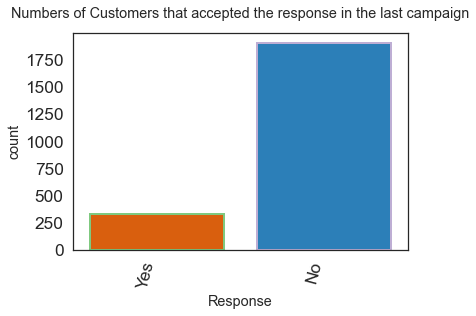

In [119]:
figx = plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2) # set the font size
sns.set_style('white') # show white grids

ax = sns.countplot(data=md_reduced
             , x='Response'
             #, hue='Education'
             , saturation=1

             , palette= ['#d95f0e', '#2c7fb8']
             , linewidth=2
             , edgecolor=sns.color_palette("Accent", 2)
            )
# rotate the label text for the x-axis to 75 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, horizontalalignment='right', fontsize='large')
plt.yticks(fontsize='large')

# set the title of the chat
plt.title('Numbers of Customers that accepted the response in the last campaign', y=1.04)
plt.show()

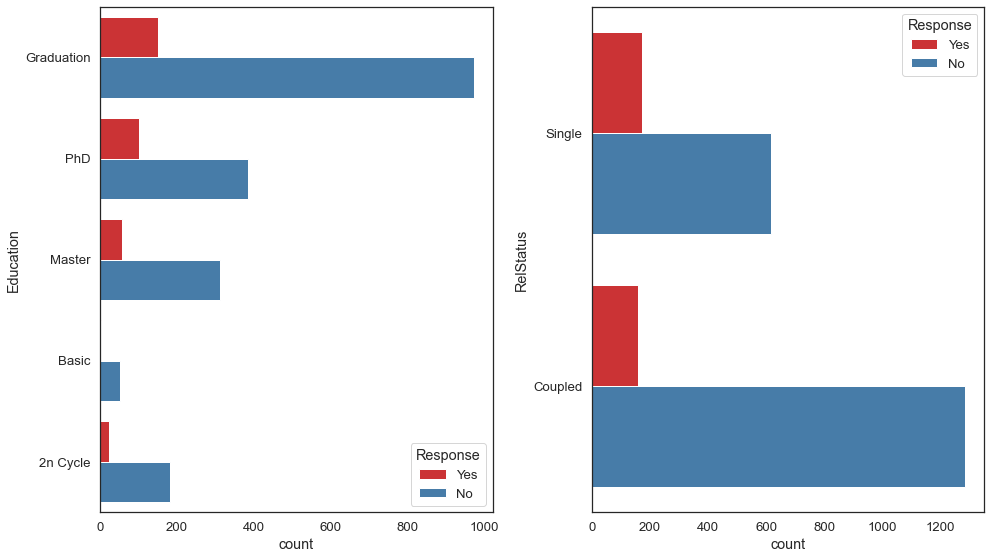

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
flatten_axes = axes.flatten()

# loop through the elements of the education and MaritalStatus variables
for ax, col in zip(flatten_axes, ['Education', 'RelStatus']):
    sns.countplot(y = col, hue='Response', data=md_reduced, ax=ax, palette='Set1')
plt.tight_layout()
plt.show()

The countplot charts above show the number of customers who reponded to the campaign broken down by their education and relationship status. The charts indicate a larger proportion of customers who finished high school responded "No" to the campaign, compared to those who obtained a higher level of education.  Furthermore, a greater proportion of single customers responded "Yes" to the campaign, compared to those who were married or coupled.

In [124]:
mdYes = md_reduced[md_reduced['Response'] == 'Yes']
mdNo = md_reduced[md_reduced['Response'] == 'No']

In [125]:
mdYes.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,332.0,1969.334337,12.366006,1943.0,1959.00,1971.0,1979.00,1996.0
Income,332.0,60259.519748,23233.306308,7500.0,39743.25,64115.0,80810.25,105471.0
Recency,332.0,35.412651,27.657840,0.0,11.00,30.0,56.00,99.0
NumWebVisitsMonth,332.0,5.298193,2.562499,1.0,3.00,6.0,8.00,10.0
Complain,332.0,0.009036,0.094771,0.0,0.00,0.0,0.00,1.0
amountSpent,332.0,988.400602,720.403222,17.0,250.50,1057.5,1618.00,2525.0
numOfPurchases,332.0,17.689759,6.872830,4.0,12.00,18.0,22.00,34.0
numOfMinorsHome,332.0,0.647590,0.741045,0.0,0.00,0.0,1.00,3.0
prvAcceptedCampaigns,332.0,0.987952,1.121005,0.0,0.00,1.0,2.00,4.0
dateCustYear,332.0,2012.753012,0.690346,2012.0,2012.00,2013.0,2013.00,2014.0


In [126]:
mdNo.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,1903.0,1968.698371,11.914585,1893.0,1959.0,1970.0,1977.0,1996.0
Income,1903.0,50491.514000,20848.633351,1730.0,34421.0,50014.0,66163.5,162397.0
Recency,1903.0,51.557015,28.512247,0.0,27.0,52.0,77.0,99.0
NumWebVisitsMonth,1903.0,5.320547,2.401199,0.0,4.0,6.0,7.0,20.0
Complain,1903.0,0.009459,0.096820,0.0,0.0,0.0,0.0,1.0
amountSpent,1903.0,538.909091,553.236681,5.0,62.0,313.0,955.0,2525.0
numOfPurchases,1903.0,14.361534,7.711043,0.0,7.0,14.0,21.0,44.0
numOfMinorsHome,1903.0,1.004204,0.741572,0.0,1.0,1.0,1.0,3.0
prvAcceptedCampaigns,1903.0,0.177089,0.472882,0.0,0.0,0.0,0.0,4.0
dateCustYear,1903.0,2013.077246,0.671504,2012.0,2013.0,2013.0,2014.0,2014.0


The tables above show the descriptive statistics of the numeric variables for customers who did and did not accept the marketing campaign. Those who accepted the campaign had an average of \$60,260 in income, compared to those who did not accept the campaign, with an average of \$50,492. Customers who said yes also spent an average of \$988, compared to those who did not accept the campaign, at \$539.  Those who accepted the campaign had a higher average number of purchases, a lower average number of minors at home, and a higher number of previously accepted campaigns.

In [127]:
# Replace the values of response variable back to 0 and 1 in the data set
md_reduced.loc[md_reduced['Response'] == 'Yes', 'Response'] = 1
md_reduced.loc[md_reduced['Response'] == 'No', 'Response'] = 0

In [128]:
# Write cleaned data file to to_csv

md_reduced.to_csv('mdClean.csv')